In [268]:
import pandas as pd
%matplotlib inline
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7.0, 7.0)
os.environ["NLS_LANG"] = "American_America.AL32UTF8"

import numpy as np
import seaborn as sns

## Данные - датасет и загрузка

В современной финтех индустрии одной из ключевых сфер для применения data science является процесс кредитного скоринга.
Скоринговые модели помогают датасаентистам определить, какие клиенты с наибольшей вероятностью вернут выданный кредит, что помогает банку сформировать прибыльный продуктовый портфель и управлять рисками.

В этом кейсе вам предстоит исследовать данные о заявках клиентов на кредитную карту и кредитной истории.
- Для задания понадобятся данные из https://www.kaggle.com/rikdifos/credit-card-approval-prediction (также Вы можете найти данные [в данной папке](https://drive.google.com/drive/folders/1v5RTvwpLfYVO86KfXyfMsT3DEXb7hnCG?usp=sharing))
- Описание данных находится на страничке датасета.

In [269]:
# Загрузим файлы датасета.
app = pd.read_csv("application_record.csv", sep=",")
app.columns = map(str.lower, app.columns)

credit = pd.read_csv("credit_record.csv", sep=",")
credit.columns = map(str.lower, credit.columns)

In [270]:
app.head(3)

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [271]:
credit.head(3)

,id,months_balance,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


### Задание 1 - проверка качества данных
Перечислите названия колонок датасета app, в котором есть незаполненные (Null) значения.

In [272]:
app.columns[app.isna().sum()>0]

Index(['occupation_type'], dtype='object')

In [273]:
app.isna().any()

id                     False
code_gender            False
flag_own_car           False
flag_own_realty        False
cnt_children           False
amt_income_total       False
name_income_type       False
name_education_type    False
name_family_status     False
name_housing_type      False
days_birth             False
days_employed          False
flag_mobil             False
flag_work_phone        False
flag_phone             False
flag_email             False
occupation_type         True
cnt_fam_members        False
dtype: bool

### Задание 2 - проверка качества данных
Рассчитайте долю незаполненных значений в колонке с их максимальным количеством.
Результат округлите до двух знаков после запятой (округление в большую сторону).

In [274]:
occup_type_null = round(app['occupation_type'].isnull().sum() /app['occupation_type'].shape[0], 2)
occup_type_null

0.31

In [275]:
print(f"{app['occupation_type'].isna().value_counts(normalize=True)[True]: .2f}")
print(f"{app['occupation_type'].isna().value_counts(normalize=True)[True]*100: .2f}%")

 0.31
 30.60%


### Задание 3
Определите число дубликатов в столбце с айди клиента (id)

In [276]:
app.duplicated(subset=['id']).value_counts()[1]

47

In [277]:
app['id'].duplicated().value_counts()[True]

47

### Задание 4
Определите самые популярные профессии клиентов (occupation_type), исключая Null значения, отсортировав их по числу id.

Результат представьте в виде dict вида {профессия:число клиентов}.

In [278]:
app['occupation_type'].value_counts().to_dict()

{'Laborers': 78240,
 'Core staff': 43007,
 'Sales staff': 41098,
 'Managers': 35487,
 'Drivers': 26090,
 'High skill tech staff': 17289,
 'Accountants': 15985,
 'Medicine staff': 13520,
 'Cooking staff': 8076,
 'Security staff': 7993,
 'Cleaning staff': 5845,
 'Private service staff': 3456,
 'Low-skill Laborers': 2140,
 'Secretaries': 2044,
 'Waiters/barmen staff': 1665,
 'Realty agents': 1041,
 'HR staff': 774,
 'IT staff': 604}

### Задание 5
Клиенты с каким уровнем образования (name_education_type) имеют наибольший средний доход? Помимо уровня образования укажите и средний доход для него, округленный до двух знаков после запятой.

In [279]:
ed_income = app.groupby(['name_education_type']).agg({'amt_income_total':'mean'}).sort_values(by='amt_income_total',ascending=False).reset_index()

ed_income['avg_income'] = round(ed_income['amt_income_total'], 2)

ed_income

,name_education_type,amt_income_total,avg_income
0,Academic degree,240692.307692,240692.31
1,Higher education,226106.872502,226106.87
2,Incomplete higher,207331.018315,207331.02
3,Secondary / secondary special,172056.654071,172056.65
4,Lower secondary,143933.865218,143933.87


In [280]:
app.groupby(['name_education_type'])['amt_income_total'].mean().round(2)

name_education_type
Academic degree                  240692.31
Higher education                 226106.87
Incomplete higher                207331.02
Lower secondary                  143933.87
Secondary / secondary special    172056.65
Name: amt_income_total, dtype: float64

### Задание 6
Для клиентов с уровнем образования из п4 и семейным положением (name_family_status) Married, выясните, у кого в среднем больше доход (amt_income_total) - у клиентов с машиной или без?

In [281]:
app.query('name_education_type == "Academic degree" & name_family_status == "Married"').groupby('flag_own_car').agg({'amt_income_total':'mean'})

,amt_income_total
flag_own_car,
N,233787.162162
Y,211764.705882


In [282]:
q6 = app[(app['name_education_type'] == 'Academic degree') & (app['name_family_status'] == 'Married')]
q6.groupby('flag_own_car')['amt_income_total'].mean()

flag_own_car
N    233787.162162
Y    211764.705882
Name: amt_income_total, dtype: float64

В среднем больше доход у клиентов без машины

### Задание 7
Рассчитайте разнциу между медианным стажем (days_employed) мужчин и женщин в месяцах. В ответе приведите модуль от это числа, округленный до двух знаков после запятой.

In [283]:
median_empl = app.groupby('code_gender').agg({'days_employed' : 'median'}).reset_index()
median_empl['month_employed'] = abs(median_empl['days_employed'] / 30)

median_empl_diff = round(abs(median_empl['month_employed'][0] - median_empl['month_employed'][1]), 2)

median_empl_diff

3.37

In [284]:
exp = app.groupby('code_gender')['days_employed'].median()/30
print(f"{abs(exp['M'] - exp['F']): .2f}")

 3.37


### Задание 8
Для женщин, чей доход или стаж строго выше 75 перцентиля аналогичных показателей для мужчин, определите наиболее популярную профессию (occupation_type). Null значения в occupation_type не учитывать, как и в пункте 4.

В качесте ответа приведите название этой профессии.

In [285]:
m_inc_quartiles = app[app['code_gender'] == 'M']['amt_income_total'].describe()[4:7]
m_emp_quartiles = app[app['code_gender'] == 'M']['days_employed'].describe()[4:7]
female_app = app[app['code_gender'] == 'F']
female_app[(female_app['amt_income_total'] > m_inc_quartiles['75%'])
 | (female_app['days_employed'] > m_emp_quartiles['75%'])]['occupation_type'].value_counts().index[0]

'Sales staff'

### Задание 9
Оцените наличие связи между размером дохода и модулем возраста при помощи коэфициента корреляции.
В качестве ответа приведите значение в процентах, округленное до 5 знаков после запятой.

In [286]:
(app[['days_birth', 'amt_income_total']].abs().corr(method='pearson')*100).round(5)

,days_birth,amt_income_total
days_birth,100.00000,-5.37746
amt_income_total,-5.37746,100.00000


### Задание 10
По результатам задания 9 при помощи коээфициента корреляции оцените силу связи между доходом и модулем возраста:

    1) сильная положительная связь
    2) слабая положительная связь
    3) нелинейная связь
    4) умеренная отрицательная связь
    5) все ответы неверны

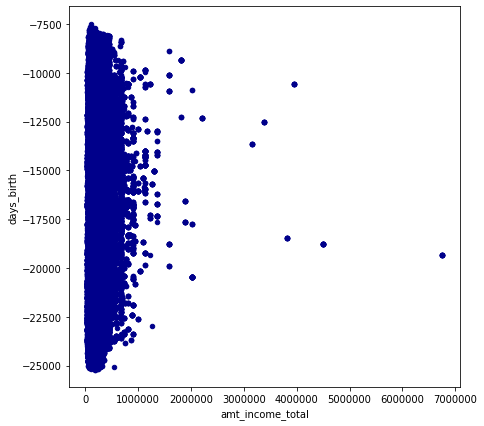

In [287]:
app.plot.scatter(x='amt_income_total',
                      y='days_birth',
                      c='DarkBlue')

In [288]:
# Выберите верный ответ: 5

### Задание 11
Какие типы занятости (name_income_type) встречаются среди клиентов с просрочкой от 30-59 дней? Ответ приведите в виде словаря с сортировкой по числу id:
{name_income_type:число id}

In [289]:
main = pd.merge(app, credit, on='id', how='left')

main_work = main[main['status'] == '1']['name_income_type'].value_counts()
main_work.to_dict()

{'Working': 4454,
 'Commercial associate': 2368,
 'Pensioner': 1157,
 'State servant': 767,
 'Student': 1}

### Задание 12
Выберите верные утверждения для клиентов с просрочкой более 150 дней:

    1) среди этих клиентов больше всего людей имеет образование уровня Lower secondary
    2) среди этих клиентов 61% - мужчины
    3) не все такие клиенты присутствуют в датасете с заявками
    4) все три утверждения выше неверны

In [290]:
# 1) среди этих клиентов больше всего людей имеет образование уровня Lower secondary - ложь

main_st_5 = main[main['status'] == '5']

main_st_5['name_education_type'].value_counts()

Secondary / secondary special    871
Higher education                 577
Lower secondary                   40
Incomplete higher                 39
Name: name_education_type, dtype: int64

In [291]:
# 2) среди этих клиентов 61% - мужчины - ложь - мужчин меньше 61%

main_st_5['code_gender'].value_counts(normalize=True)

F    0.529797
M    0.470203
Name: code_gender, dtype: float64

In [292]:
# 3) не все такие клиенты присутствуют в датасете с заявками - Правда

In [293]:
credit[credit['status'] == '5']['id'].isin(app['id']).value_counts()

True     1527
False     166
Name: id, dtype: int64

In [294]:
# Выберите верный ответ на основании расчетов выше: 3